In [ ]:
import matplotlib.pyplot as plt
import random
from rpmml_project.pointmaze.point_maze_2 import MinariTrajectoryDataset

In [64]:
dataset = MinariTrajectoryDataset(
    dataset_name="D4RL/pointmaze/umaze-v2",
    horizon=32
)

In [63]:
env = dataset.dataset.recover_environment()

def unwrap_env(env):
    while hasattr(env, "env"):
        env = env.env
    return env

env = unwrap_env(env)

mj_model = env.model
mj_data = env.data

In [55]:
from matplotlib.patches import Rectangle
import mujoco

In [56]:
print(len(dataset))

339589


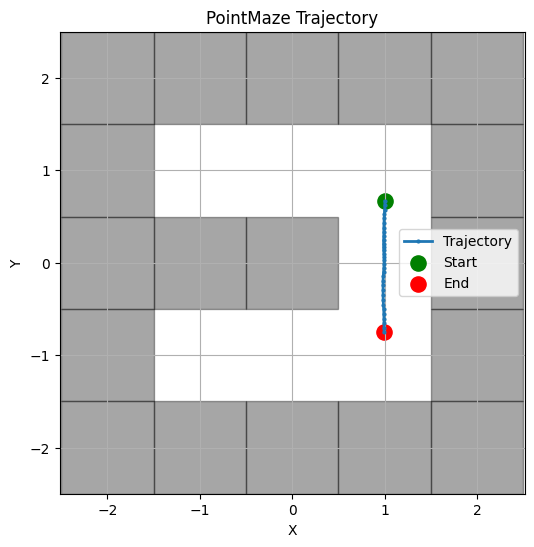

In [81]:
# Sample a trajectory window
idx = random.randint(0, len(dataset) - 1)
traj_norm = dataset[idx]
traj = dataset.denormalize(traj_norm).numpy()
xy = traj[:, :2]           # XY coordinates (i.e., flat outputs)

# Plot the trajectory
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(xy[:, 0], xy[:, 1], marker='o', linewidth=2, markersize=2, label='Trajectory')
ax.scatter(xy[0, 0], xy[0, 1], c='green', s=120, label='Start')
ax.scatter(xy[-1, 0], xy[-1, 1], c='red', s=120, label='End')

# Render MuJoCo walls
for geom_id in range(mj_model.ngeom):

    # Get geom name
    name = mujoco.mj_id2name(mj_model, mujoco.mjtObj.mjOBJ_GEOM, geom_id)

    if name is None or not "block" in name:
        continue

    pos = mj_model.geom_pos[geom_id]     # center (x, y, z)
    size = mj_model.geom_size[geom_id]   # half-extents (hx, hy, hz)

    cx, cy = pos[:2]
    hx, hy = size[:2]

    rect = Rectangle(
        (cx - hx, cy - hy),
        2 * hx,
        2 * hy,
        color="black",
        alpha=0.35,
        zorder=0
    )
    ax.add_patch(rect)

# Final figure styling
ax.set_title("PointMaze Trajectory")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.axis("equal")
ax.grid(True)
ax.legend()
plt.xlim(-2.5, +2.5)
plt.ylim(-2.5, +2.5)

# plt.show()
plt.savefig("trajectory.png")

In [82]:
traj

array([[ 1.00196292e+00,  6.65424612e-01, -1.26706717e-01,
        -4.13563848e+00],
       [ 1.00193504e+00,  6.21785076e-01, -2.79140181e-03,
        -4.36395255e+00],
       [ 1.00018451e+00,  5.75867851e-01, -1.75048824e-01,
        -4.59172305e+00],
       [ 9.96466511e-01,  5.27678343e-01, -3.71803473e-01,
        -4.81895111e+00],
       [ 9.94228676e-01,  4.79093733e-01, -2.23781642e-01,
        -4.85846123e+00],
       [ 9.93216505e-01,  4.29096987e-01, -1.01218773e-01,
        -4.99967433e+00],
       [ 9.91184876e-01,  3.79837975e-01, -2.03161435e-01,
        -4.92590063e+00],
       [ 9.91050933e-01,  3.33077944e-01, -1.33953871e-02,
        -4.67600542e+00],
       [ 9.90556789e-01,  2.87955542e-01, -4.94152479e-02,
        -4.51223770e+00],
       [ 9.88560529e-01,  2.45322283e-01, -1.99623688e-01,
        -4.26332751e+00],
       [ 9.88539447e-01,  2.05172187e-01, -2.11080298e-03,
        -4.01500996e+00],
       [ 9.89420474e-01,  1.67499336e-01,  8.81029207e-02,
      